In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import pyspark
import matplotlib.pyplot as plt
from pyspark import SparkContext
sns.set(style="darkgrid")

In [2]:
#df = spark.read.csv('/FileStore/tables/Adatok.csv', sep = ';', header = "True")
df = spark.read.csv('/FileStore/tables/Distances-3.csv', sep = ';', header = "True")
df = df.toPandas()
df.Distance = df.Distance.astype("double")
df.head(5)

,Ref_User,Ref_User_Emotion,Ref_User_Emotion_Percentage,Eval,Eval_User_Emotion,Eval_User_Emotion_Percentage,Emotion,Intensity,Dimension,Distance,Within_User
0,Alpha,A,9,Alpha,A,21,Anger,Low,128,0.000,1
1,Alpha,A,10,Alpha,A,23,Anger,Low,128,0.000,1
2,Alpha,A,8,Alpha,A,20,Anger,Low,128,0.000,1
3,Alpha,A,9,Alpha,A,20,Anger,Low,128,0.014,1
4,Alpha,A,8,Alpha,A,21,Anger,Low,128,0.014,1


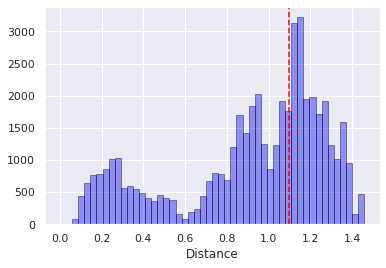

In [3]:
distp = sns.distplot(df['Distance'], hist=True, kde=False,color = 'blue',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

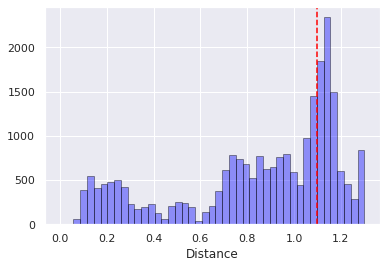

In [4]:
df_128 = df[df.Dimension == '128']
distp_128 = sns.distplot(df_128['Distance'], hist=True, kde=False, color = 'blue',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

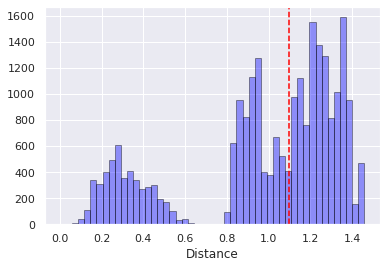

In [5]:
df_512 = df[df.Dimension == '512']
distp = sns.distplot(df_512['Distance'], hist=True, kde=False, color = 'blue',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

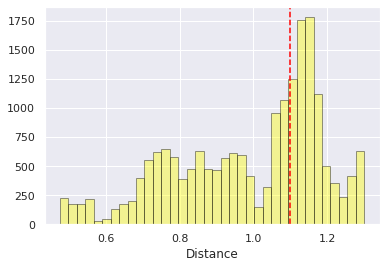

In [6]:
df_within_t = df[(df.Within_User == '0') & (df.Dimension == '128')]
distp = sns.distplot(df_within_t['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

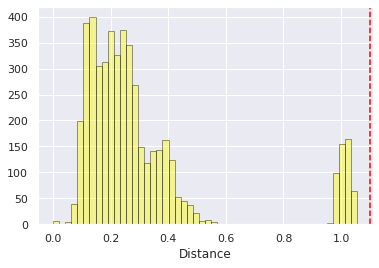

In [7]:
df_within_f = df[(df.Within_User == '1') & (df.Dimension == '128')]
distp = sns.distplot(df_within_f['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

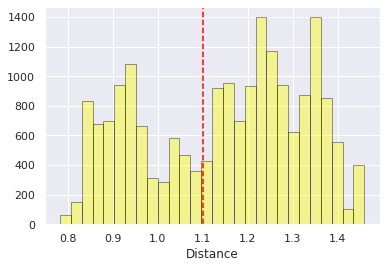

In [8]:
df_within_f = df[(df.Within_User == '0') & (df.Dimension == '512')]
distp = sns.distplot(df_within_f['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

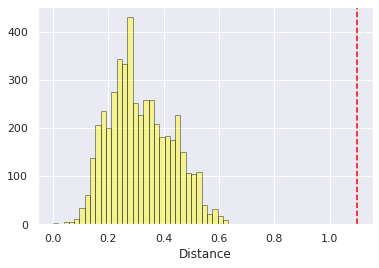

In [9]:
df_within_f = df[(df.Within_User == '1') & (df.Dimension == '512')]
distp = sns.distplot(df_within_f['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

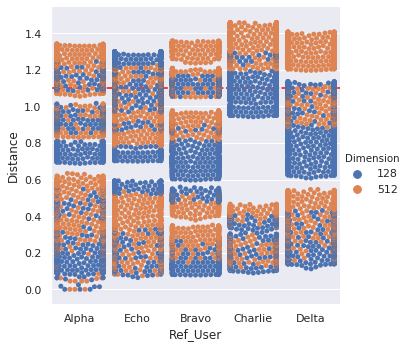

In [10]:
cat = sns.catplot(x="Ref_User", y="Distance", hue="Dimension", kind="swarm", data=df);
plt.axhline(1.1, color="red", linestyle="--");

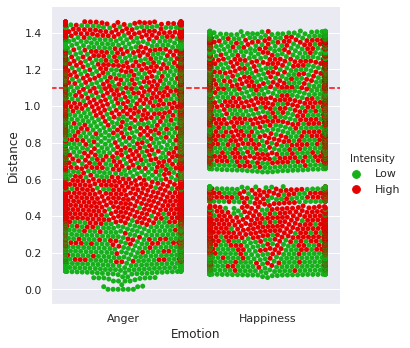

In [11]:
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

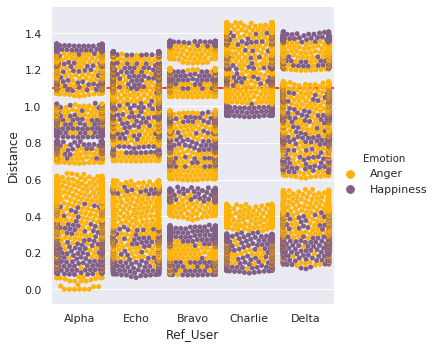

In [12]:
cat = sns.catplot(x="Ref_User", y="Distance", hue="Emotion", kind="swarm", data=df, palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

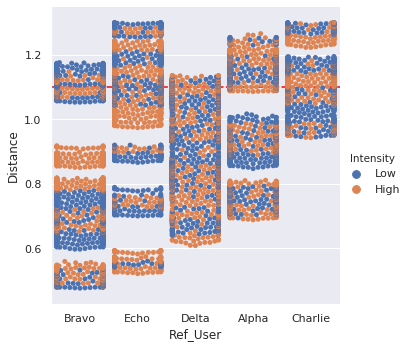

In [13]:
df_128 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_128);
plt.axhline(1.1, color="red", linestyle="--");

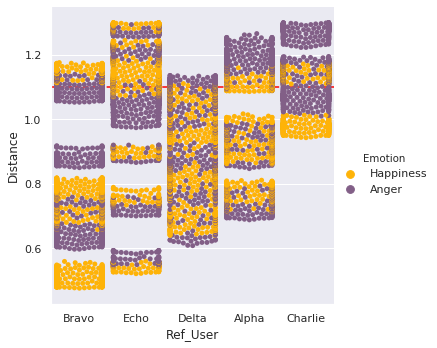

In [14]:
df_128 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_128, palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

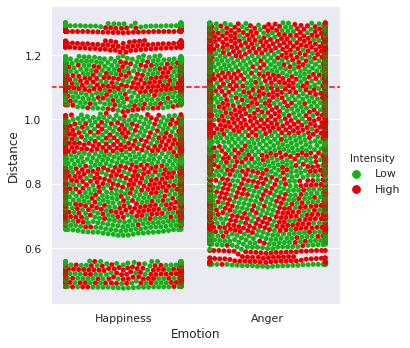

In [15]:
df_128 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_128, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

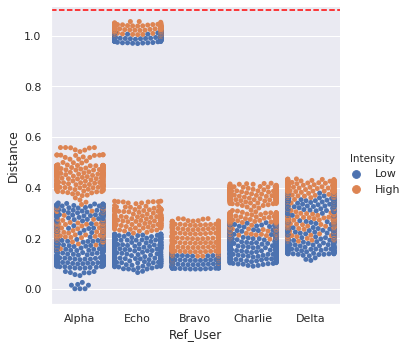

In [16]:
df_128 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_128);
plt.axhline(1.1, color="red", linestyle="--");

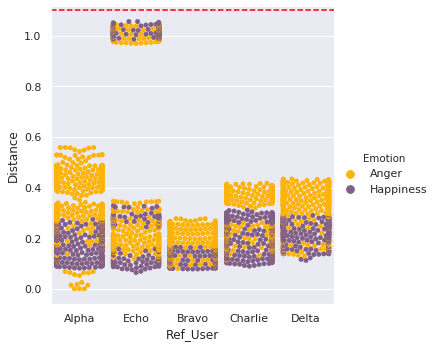

In [17]:
df_128 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_128,palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

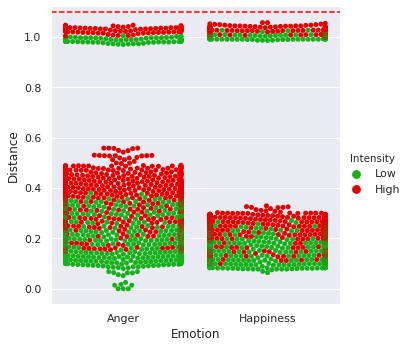

In [18]:
df_128 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_128, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

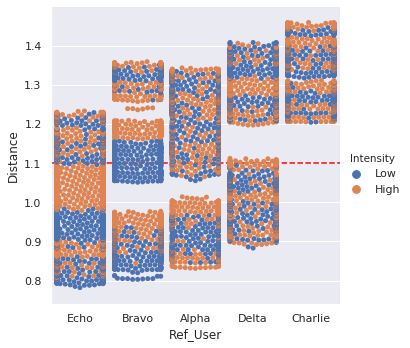

In [19]:
df_512 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_512);
plt.axhline(1.1, color="red", linestyle="--");

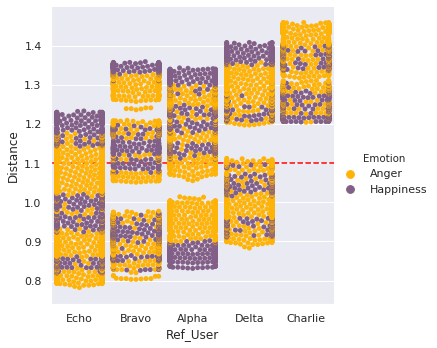

In [20]:
df_512 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_512,palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

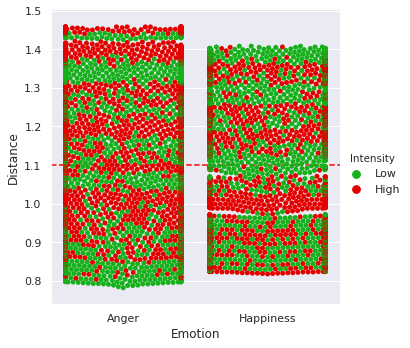

In [21]:
df_512 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_512, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

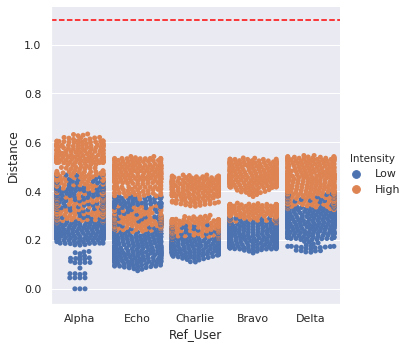

In [22]:
df_512 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_512);
plt.axhline(1.1, color="red", linestyle="--");

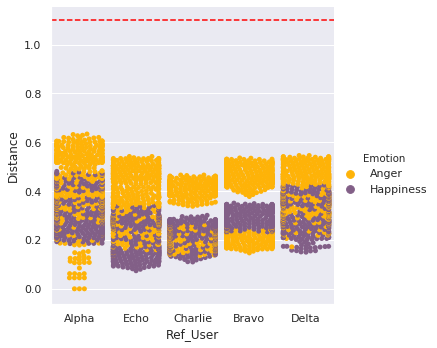

In [23]:
df_512 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_512, palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

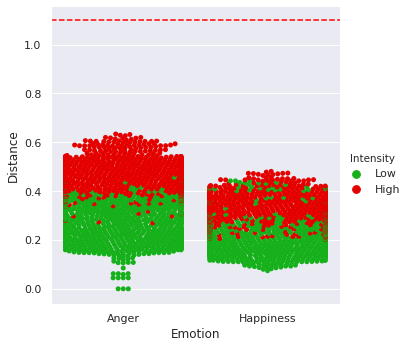

In [24]:
df_512 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_512, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

In [25]:
df.Ref_User_Emotion_Percentage = df.Ref_User_Emotion_Percentage.astype("int32")
df.Eval_User_Emotion_Percentage = df.Eval_User_Emotion_Percentage.astype("int32")
df.Dimension = df.Dimension.astype("int32")
df.Within_User = df.Within_User.astype("int32")

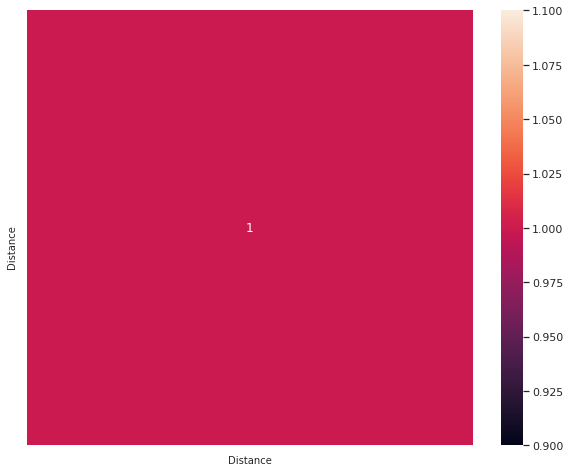

In [26]:
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, yticklabels=corr_df.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf(); heat_map.set_size_inches(10,8)
plt.xticks(fontsize=10); plt.yticks(fontsize=10); 
plt.show()

In [27]:
df['Emotion_And_Intensity'] = df[['Emotion', 'Intensity']].apply(lambda x: '_'.join(x), axis=1)
df.head(5)

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-4488028818128304> in <module> 
 ----> 1 df [ 'Emotion_And_Intensity' ] = df [ [ 'Emotion' , 'Intensity' ] ] . apply ( lambda x : '_' . join ( x ) , axis = 1 ) 
 2 df . head ( 5 ) 

 /databricks/python/lib/python3.7/site-packages/pandas/core/frame.py in apply (self, func, axis, raw, result_type, args, **kwds) 
 6876 kwds = kwds , 
 6877 )
 -> 6878 return op . get_result ( ) 
 6879 
 6880 def applymap ( self , func ) -> "DataFrame" : 

 /databricks/python/lib/python3.7/site-packages/pandas/core/apply.py in get_result (self) 
 184 return self . apply_raw ( ) 
 185 
 --> 186 return self . apply_standard ( ) 
 187 
 188 def apply_empty_result ( self ) : 

 /databricks/python/lib/python3.7/site-packages/pandas/core/apply.py in apply_standard (self) 
 294 try : 
 295 result = libreduction.compute_reduction(
 --> 296 values , self . f , axis = self . axis , dummy = dummy , labels = labels
 297 )
 298 except ValueError as err : 

 pandas/_libs/reduction.pyx in pandas._libs.reduction.compute_reduction () 

 pandas/_libs/reduction.pyx in pandas._libs.reduction.Reducer.get_result () 

 <command-4488028818128304> in <lambda> (x) 
 ----> 1 df [ 'Emotion_And_Intensity' ] = df [ [ 'Emotion' , 'Intensity' ] ] . apply ( lambda x : '_' . join ( x ) , axis = 1 ) 
 2 df . head ( 5 ) 

 TypeError : sequence item 0: expected str instance, NoneType found

In [28]:
df_128_0 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat_128_0 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_128_0, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-1299468147312299> in <module> 
 1 df_128_0 = df [ ( df . Within_User == '0' ) & ( df . Dimension == '128' ) ] 
 ----> 2 cat_128_0 = sns . catplot ( x = "Ref_User" , y = "Distance" , hue = "Emotion_And_Intensity" , kind = "swarm" , data = df_128_0 , palette = sns . xkcd_palette ( [ "amber" , "dusty purple" , "tea" , "royal" ] ) ) ; 
 3 plt . axhline ( 1.1 , color = "red" , linestyle = "--" ) ; 

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in catplot (x, y, hue, data, row, col, col_wrap, estimator, ci, n_boot, units, seed, order, hue_order, row_order, col_order, kind, height, aspect, orient, color, palette, legend, legend_out, sharex, sharey, margin_titles, facet_kws, **kwargs) 
 3724 # facets to ensure representation of all data in the final plot 
 3725 p = _CategoricalPlotter ( ) 
 -> 3726 p . establish_variables ( x_ , y_ , hue , data , orient , order , hue_order ) 
 3727 order = p . group_names
 3728 hue_order = p . hue_names

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in establish_variables (self, x, y, hue, data, orient, order, hue_order, units) 
 150 if isinstance ( var , str ) : 
 151 err = "Could not interpret input '{}'" . format ( var ) 
 --> 152 raise ValueError ( err ) 
 153 
 154 # Figure out the plotting orientation 

 ValueError : Could not interpret input 'Emotion_And_Intensity'

In [29]:
df_128_1 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat_128_1 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_128_1, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-1299468147312300> in <module> 
 1 df_128_1 = df [ ( df . Within_User == '1' ) & ( df . Dimension == '128' ) ] 
 ----> 2 cat_128_1 = sns . catplot ( x = "Ref_User" , y = "Distance" , hue = "Emotion_And_Intensity" , kind = "swarm" , data = df_128_1 , palette = sns . xkcd_palette ( [ "amber" , "dusty purple" , "tea" , "royal" ] ) ) ; 
 3 plt . axhline ( 1.1 , color = "red" , linestyle = "--" ) ; 

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in catplot (x, y, hue, data, row, col, col_wrap, estimator, ci, n_boot, units, seed, order, hue_order, row_order, col_order, kind, height, aspect, orient, color, palette, legend, legend_out, sharex, sharey, margin_titles, facet_kws, **kwargs) 
 3724 # facets to ensure representation of all data in the final plot 
 3725 p = _CategoricalPlotter ( ) 
 -> 3726 p . establish_variables ( x_ , y_ , hue , data , orient , order , hue_order ) 
 3727 order = p . group_names
 3728 hue_order = p . hue_names

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in establish_variables (self, x, y, hue, data, orient, order, hue_order, units) 
 150 if isinstance ( var , str ) : 
 151 err = "Could not interpret input '{}'" . format ( var ) 
 --> 152 raise ValueError ( err ) 
 153 
 154 # Figure out the plotting orientation 

 ValueError : Could not interpret input 'Emotion_And_Intensity'

In [30]:
df_512_0 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat_512_0 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_512_0, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-1299468147312301> in <module> 
 1 df_512_0 = df [ ( df . Within_User == '0' ) & ( df . Dimension == '512' ) ] 
 ----> 2 cat_512_0 = sns . catplot ( x = "Ref_User" , y = "Distance" , hue = "Emotion_And_Intensity" , kind = "swarm" , data = df_512_0 , palette = sns . xkcd_palette ( [ "amber" , "dusty purple" , "tea" , "royal" ] ) ) ; 
 3 plt . axhline ( 1.1 , color = "red" , linestyle = "--" ) ; 

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in catplot (x, y, hue, data, row, col, col_wrap, estimator, ci, n_boot, units, seed, order, hue_order, row_order, col_order, kind, height, aspect, orient, color, palette, legend, legend_out, sharex, sharey, margin_titles, facet_kws, **kwargs) 
 3724 # facets to ensure representation of all data in the final plot 
 3725 p = _CategoricalPlotter ( ) 
 -> 3726 p . establish_variables ( x_ , y_ , hue , data , orient , order , hue_order ) 
 3727 order = p . group_names
 3728 hue_order = p . hue_names

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in establish_variables (self, x, y, hue, data, orient, order, hue_order, units) 
 150 if isinstance ( var , str ) : 
 151 err = "Could not interpret input '{}'" . format ( var ) 
 --> 152 raise ValueError ( err ) 
 153 
 154 # Figure out the plotting orientation 

 ValueError : Could not interpret input 'Emotion_And_Intensity'

In [31]:
df_512_1 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat_512_1 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_512_1, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-1299468147312302> in <module> 
 1 df_512_1 = df [ ( df . Within_User == '1' ) & ( df . Dimension == '512' ) ] 
 ----> 2 cat_512_1 = sns . catplot ( x = "Ref_User" , y = "Distance" , hue = "Emotion_And_Intensity" , kind = "swarm" , data = df_512_1 , palette = sns . xkcd_palette ( [ "amber" , "dusty purple" , "tea" , "royal" ] ) ) ; 
 3 plt . axhline ( 1.1 , color = "red" , linestyle = "--" ) ; 

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in catplot (x, y, hue, data, row, col, col_wrap, estimator, ci, n_boot, units, seed, order, hue_order, row_order, col_order, kind, height, aspect, orient, color, palette, legend, legend_out, sharex, sharey, margin_titles, facet_kws, **kwargs) 
 3724 # facets to ensure representation of all data in the final plot 
 3725 p = _CategoricalPlotter ( ) 
 -> 3726 p . establish_variables ( x_ , y_ , hue , data , orient , order , hue_order ) 
 3727 order = p . group_names
 3728 hue_order = p . hue_names

 /databricks/python/lib/python3.7/site-packages/seaborn/categorical.py in establish_variables (self, x, y, hue, data, orient, order, hue_order, units) 
 150 if isinstance ( var , str ) : 
 151 err = "Could not interpret input '{}'" . format ( var ) 
 --> 152 raise ValueError ( err ) 
 153 
 154 # Figure out the plotting orientation 

 ValueError : Could not interpret input 'Emotion_And_Intensity'